In [36]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
os.chdir('../')

In [3]:
PATH = Path.cwd()
PATH_DATA = PATH / 'data'

In [4]:
PATH

PosixPath('/home/krivas/projects/disambiguation-dataset')

In [11]:
path_files = []
for root, dirs, files in os.walk(PATH / 'data'):
    for file in files:
        if 'verb' in root and file[0] == 'D':
            #print(root , file)
            path_files.append(os.path.join(root, file))
    

### Explore dataset

In [7]:
selected_words = ['tratar', 'estabelecer', 'marcar', 'vir', 'colocar', 'fechar', 'dar', 'cair',\
                 'encontrar', 'registrar', 'levar', 'receber', 'apresentar', 'passar', 'deixar', 'chegar',\
                 'ficar', 'fazar', 'ter', 'ser']

In [17]:
def check_line(line):
    for word in selected_words:
        if word in line:
            return True
    
    return False

In [22]:
import re

def check_word_tag(line):
    for word in selected_words:
        if word in line and re.findall(f'{word}<', line):
            return True
    
    return False

In [29]:
texts = []
tagged_texts = []
total = 0
for path in path_files:
    with open(path) as file:
        for line in file.readlines():
            total += 1
            if check_line(line):
                texts.append(line)
                if check_word_tag(line):
                    tagged_texts.append(line)

print(f'total texts: {total} texts with ambiguous word: {len(texts)}  texts with tag: {len(tagged_texts)}')

total texts: 3524 texts with ambiguous word: 587  texts with tag: 178


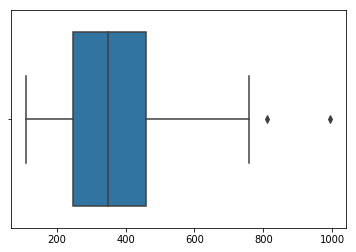

In [37]:
lenghts = [len(text) for text in tagged_texts]
sns.boxplot(lenghts)
plt.show()